In [26]:
import pandas as pd
import os
from functools import reduce

In [27]:
folder_path = '/Users/ariana/Desktop/DSITW - Final Project/Data Tables'

investments_path = os.path.join(folder_path, 'investments.csv')
objects_path = os.path.join(folder_path, 'objects.csv')
people_path = os.path.join(folder_path, 'people.csv')
funding_rounds_path = os.path.join(folder_path, 'funding_rounds.csv')
milestones_path = os.path.join(folder_path, 'milestones.csv')

In [28]:
data_frames = []

for filename in os.listdir(folder_path):
    if filename.endswith('.csv') and filename != 'objects.csv':  # Exclude objects.csv
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        data_frames.append(df)
#data_frames

### Defining a "good" match:

1. Alignment with Investor's Preferences: This could include the investor's historical investment patterns, preferred sectors, typical investment stages (seed, Series A, etc.), geographical preferences, and the size of investments they typically make.

2. Startup's Potential for Success: This could be indicated by factors such as the startup's sector, growth rate, stage of development, the track record of its founders and team (education, past successes), and its funding history (amount raised, valuation growth, etc.).

A 'good' match would be a startup that aligns well with an investor's preferences and shows promising indicators of future success.

### Data Collection and Integration Plan:

To build a dataset that will allow us to match investors with startups, we need to integrate data from several tables. Below are the steps to achieve this:

- Investments Data (investments.csv):

1. Identify investors and the startups they have invested in.
2. Extract features such as the number of investments, average investment amount, sectors invested in, and stages of investment.

- Objects Data (objects.csv):

1. Contains details on both people and companies.
2. For companies: Extract startup sector, stage, location, and funding history.
3. For people: Extract professional backgrounds, which could be used to infer the quality of the startup team.

- People Data (people.csv):

1. Obtain information about individuals, which can be used to create features around the founders' and key personnel's experience and track records.

- Funding Rounds Data (funding_rounds.csv):

1. Gather information on the funding rounds of startups, such as the amount raised, the date of funding, and the funding stage.

- Milestones Data (milestones.csv):

1. Collect data on significant achievements by startups, which could indicate their growth and potential for success.

### Loading the data

In [29]:
investments_df = pd.read_csv(investments_path)
objects_df = pd.read_csv(objects_path)
people_df = pd.read_csv(people_path)
funding_rounds_df = pd.read_csv(funding_rounds_path)
milestones_df = pd.read_csv(milestones_path)

/var/folders/2s/p1k4247d415_4x20kdhsxn8h0000gn/T/ipykernel_84487/2764848474.py:2: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects_df = pd.read_csv(objects_path)


## Merging dataframes

In [30]:
# Merge investments with objects to get detailed information about startups
investments_extended_df = investments_df.merge(
    objects_df, 
    left_on='funded_object_id', 
    right_on='id', 
    how='left',
    suffixes=('', '_object')  # Suffix for the columns from objects_df
)

# Merge the extended investments dataframe with people to get investor details
investments_people_df = investments_extended_df.merge(
    people_df, 
    left_on='investor_object_id', 
    right_on='object_id', 
    how='left',
    suffixes=('', '_people')  # Suffix for the columns from people_df
)

# Merge funding rounds to add information about each funding event
full_investment_df = investments_people_df.merge(
    funding_rounds_df, 
    left_on='funded_object_id', 
    right_on='object_id', 
    how='left',
    suffixes=('_investments_people', '_funding_rounds')  # Adjust suffixes accordingly
)

# Merge milestones to add startup success indicators
full_startup_df = full_investment_df.merge(
    milestones_df, 
    left_on='funded_object_id', 
    right_on='object_id', 
    how='left',
    suffixes=('_full_investment', '_milestones')  # Adjust suffixes accordingly
)

full_startup_df.head()

id_investments_people  funding_round_id_investments_people  \
0                      1                                    1   
1                      1                                    1   
2                      1                                    1   
3                      1                                    1   
4                      1                                    1   

  funded_object_id investor_object_id created_at_investments_people  \
0              c:4                f:1           2007-07-04 04:52:57   
1              c:4                f:1           2007-07-04 04:52:57   
2              c:4                f:1           2007-07-04 04:52:57   
3              c:4                f:1           2007-07-04 04:52:57   
4              c:4                f:1           2007-07-04 04:52:57   

  updated_at_investments_people id_object entity_type  entity_id parent_id  \
0           2008-02-27 23:14:29       c:4     Company        4.0       NaN   
1           2008-02-27 23:14:29       c:4     Company        4.0       NaN   
2           2008-02-27 23:14:29       c:4     Company        4.0       NaN   
3           2008-02-27 23:14:29       c:4     Company        4.0       NaN   
4           2008-02-27 23:14:29       c:4     Company        4.0       NaN   

   name normalized_name      permalink category_code    status  founded_at  \
0  Digg            digg  /company/digg          news  acquired  2004-10-11   
1  Digg            digg  /company/digg          news  acquired  2004-10-11   
2  Digg            digg  /company/digg          news  acquired  2004-10-11   
3  Digg            digg  /company/digg          news  acquired  2004-10-11   
4  Digg            digg  /company/digg          news  acquired  2004-10-11   

  closed_at    domain         homepage_url twitter_username  \
0       NaN  digg.com  http://www.digg.com             digg   
1       NaN  digg.com  http://www.digg.com             digg   
2       NaN  digg.com  http://www.digg.com             digg   
3       NaN  digg.com  http://www.digg.com             digg   
4       NaN  digg.com  http://www.digg.com             digg   

                                            logo_url  logo_width  logo_height  \
0  http://s3.amazonaws.com/crunchbase_prod_assets...       280.0        280.0   
1  http://s3.amazonaws.com/crunchbase_prod_assets...       280.0        280.0   
2  http://s3.amazonaws.com/crunchbase_prod_assets...       280.0        280.0   
3  http://s3.amazonaws.com/crunchbase_prod_assets...       280.0        280.0   
4  http://s3.amazonaws.com/crunchbase_prod_assets...       280.0        280.0   

  short_description         description_full_investment  \
0               NaN  user driven social content website   
1               NaN  user driven social content website   
2               NaN  user driven social content website   
3               NaN  user driven social content website   
4               NaN  user driven social content website   

                                            overview  \
0  Digg is a user driven social content website. ...   
1  Digg is a user driven social content website. ...   
2  Digg is a user driven social content website. ...   
3  Digg is a user driven social content website. ...   
4  Digg is a user driven social content website. ...   

                                            tag_list country_code state_code  \
0  community, social, news, bookmark, digg, techn...          USA         CA   
1  community, social, news, bookmark, digg, techn...          USA         CA   
2  community, social, news, bookmark, digg, techn...          USA         CA   
3  community, social, news, bookmark, digg, techn...          USA         CA   
4  community, social, news, bookmark, digg, techn...          USA         CA   

            city  region first_investment_at last_investment_at  \
0  San Francisco  SF Bay                 NaN                NaN   
1  San Francisco  SF Bay                 NaN                NaN   
2  San 

## Handling Missing Values

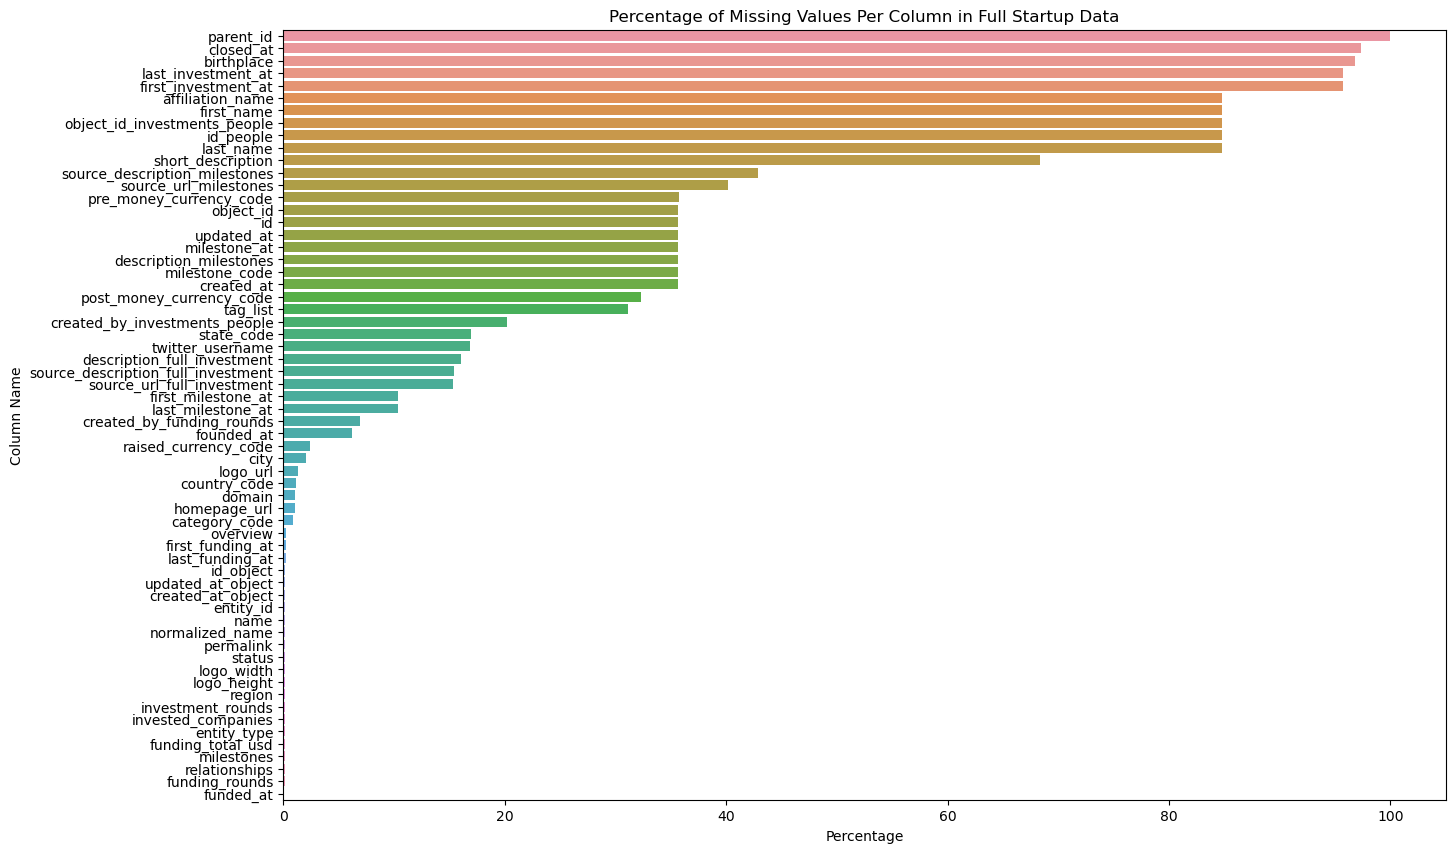

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of missing values for each column
missing_values = full_startup_df.isnull().mean() * 100

# Filter out columns that have no missing values to reduce clutter in the visualization
missing_values = missing_values[missing_values > 0]

# Sort the columns based on the percentage of missing values
missing_values.sort_values(ascending=False, inplace=True)

# Plot the results
plt.figure(figsize=(15, 10))
sns.barplot(x=missing_values.values, y=missing_values.index)
plt.title('Percentage of Missing Values Per Column in Full Startup Data')
plt.xlabel('Percentage')
plt.ylabel('Column Name')

# Show the plot
plt.show()

### Handling Missing Values

Depending on the context, there are several strategies to handle missing values:

1. Drop missing values: If the dataset is large and the number of missing values is relatively small, you can simply drop the rows or columns with missing data.
2. Impute missing values: For numerical features, you can impute missing values with a measure of central tendency (mean, median, or mode). For categorical features, the mode is commonly used.

In [32]:
# Calculate the count of missing values for each column
missing_values_count = full_startup_df.isnull().sum()

# Sort the columns based on the count of missing values
missing_values_count_sorted = missing_values_count.sort_values(ascending=False)

missing_values_count_sorted

parent_id                          407396
closed_at                          396572
birthplace                         394298
last_investment_at                 389878
first_investment_at                389878
                                    ...  
funding_round_type                      0
object_id_funding_rounds                0
funding_round_id_funding_rounds         0
id_funding_rounds                       0
id_investments_people                   0
Length: 84, dtype: int64

In [33]:
# Output all the column names from the full_startup_df DataFrame
all_columns = full_startup_df.columns.tolist()
all_columns

['id_investments_people',
 'funding_round_id_investments_people',
 'funded_object_id',
 'investor_object_id',
 'created_at_investments_people',
 'updated_at_investments_people',
 'id_object',
 'entity_type',
 'entity_id',
 'parent_id',
 'name',
 'normalized_name',
 'permalink',
 'category_code',
 'status',
 'founded_at',
 'closed_at',
 'domain',
 'homepage_url',
 'twitter_username',
 'logo_url',
 'logo_width',
 'logo_height',
 'short_description',
 'description_full_investment',
 'overview',
 'tag_list',
 'country_code',
 'state_code',
 'city',
 'region',
 'first_investment_at',
 'last_investment_at',
 'investment_rounds',
 'invested_companies',
 'first_funding_at',
 'last_funding_at',
 'funding_rounds',
 'funding_total_usd',
 'first_milestone_at',
 'last_milestone_at',
 'milestones',
 'relationships',
 'created_by_investments_people',
 'created_at_object',
 'updated_at_object',
 'id_people',
 'object_id_investments_people',
 'first_name',
 'last_name',
 'birthplace',
 'affiliation_nam

In [49]:
# List of columns to drop that may be irrelevant for the recommendation system
columns_to_drop = [
    'id_investments_people', 'id_object', 'id_people', 'id_funding_rounds',
    'created_at_investments_people', 'updated_at_investments_people', 'created_at_object',
    'updated_at_object', 'created_by_investments_people', 'created_at_funding_rounds', 
    'updated_at_funding_rounds', 'entity_type', 'entity_id', 'parent_id', 'permalink', 
    'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',
    'description_full_investment', 'created_by_funding_rounds',
    'source_url_full_investment', 'source_description_full_investment', 'source_url_milestones', 
    'source_description_milestones', 'closed_at', 'birthplace', 'affiliation_name', 'normalized_name', 'short_description',
    'object_id_investments_people', 'object_id_funding_rounds', 'object_id',
    'funding_round_id_investments_people', 'funding_round_id_funding_rounds',
    'raised_currency_code', 'pre_money_currency_code', 'post_money_currency_code',
    'created_at', 'updated_at', 'pre_money_valuation', 'post_money_valuation',     
    'first_investment_at', 'description_milestones', 'milestone_code', 'milestone_at',
    'last_investment_at', 'id', 'tag_list', 'relationships',
    'first_name',
    'last_name'
]

# Drop the columns from the DataFrame
full_startup_df = full_startup_df.drop(columns=columns_to_drop, errors='ignore')

# Set option to display all columns
pd.set_option('display.max_columns', None)
full_startup_df.head() 

funded_object_id investor_object_id  name category_code    status  \
0               c:4                f:1  Digg          news  acquired   
3               c:4                f:1  Digg          news  acquired   
6               c:4                f:1  Digg          news  acquired   
9               c:4                f:1  Digg          news  acquired   
12              c:4                f:2  Digg          news  acquired   

    founded_at                                           overview  \
0   2004-10-11  Digg is a user driven social content website. ...   
3   2004-10-11  Digg is a user driven social content website. ...   
6   2004-10-11  Digg is a user driven social content website. ...   
9   2004-10-11  Digg is a user driven social content website. ...   
12  2004-10-11  Digg is a user driven social content website. ...   

   country_code state_code           city  region  investment_rounds  \
0           USA         CA  San Francisco  SF Bay                0.0   
3           USA         CA  San Francisco  SF Bay                0.0   
6           USA         CA  San Francisco  SF Bay                0.0   
9           USA         CA  San Francisco  SF Bay                0.0   
12          USA         CA  San Francisco  SF Bay                0.0   

    invested_companies first_funding_at last_funding_at  funding_rounds  \
0                  0.0       2005-10-01      2011-07-12             4.0   
3                  0.0       2005-10-01      2011-07-12             4.0   
6                  0.0       2005-10-01      2011-07-12             4.0   
9                  0.0       2005-10-01      2011-07-12             4.0   
12                 0.0       2005-10-01      2011-07-12             4.0   

    funding_total_usd first_milestone_at last_milestone_at  milestones  \
0          45000000.0         2010-01-08        2013-12-04         8.0   
3          45000000.0         2010-01-08        2013-12-04         8.0   
6          45000000.0         2010-01-08        2013-12-04         8.0   
9          45000000.0         2010-01-08        2013-12-04         8.0   
12         45000000.0         2010-01-08        2013-12-04         8.0   

     funded_at funding_round_type funding_round_code  raised_amount_usd  \
0   2006-12-01           series-b                  b          8500000.0   
3   2005-10-01           series-a                  a          2800000.0   
6   2008-09-24          series-c+                  c         28700000.0   
9   2011-07-12          series-c+                  d          5000000.0   
12  2006-12-01           series-b                  b          8500000.0   

    raised_amount  pre_money_valuation_usd  post_money_valuation_usd  \
0       8500000.0                      0.0                       0.0   
3       2800000.0                      0.0                       0.0   
6      28700000.0                      0.0                       0.0   
9       5000000.0                      0.0                       0.0   
12      8500000.0                      0.0                       0.0   

    participants  is_first_round  is_last_round  
0              2               0              0  
3              8               0              1  
6              4               0              0  
9              0               1              0  
12             2               0              0

In [50]:
# Calculate the count of missing values for each column in the updated DataFrame
missing_values_count_updated = full_startup_df.isnull().sum()

# Sort the columns based on the count of missing values
missing_values_count_sorted_updated = missing_values_count_updated.sort_values(ascending=False)

missing_values_count_sorted_updated

state_code                  34723
last_milestone_at           29759
first_milestone_at          29759
founded_at                  15582
city                         5396
country_code                 2907
funded_at                     168
overview                      132
first_funding_at               72
last_funding_at                72
post_money_valuation_usd        0
participants                    0
pre_money_valuation_usd         0
raised_amount                   0
raised_amount_usd               0
funding_round_code              0
funding_round_type              0
is_first_round                  0
funded_object_id                0
funding_rounds                  0
milestones                      0
funding_total_usd               0
investor_object_id              0
invested_companies              0
investment_rounds               0
region                          0
status                          0
category_code                   0
name                            0
is_last_round 

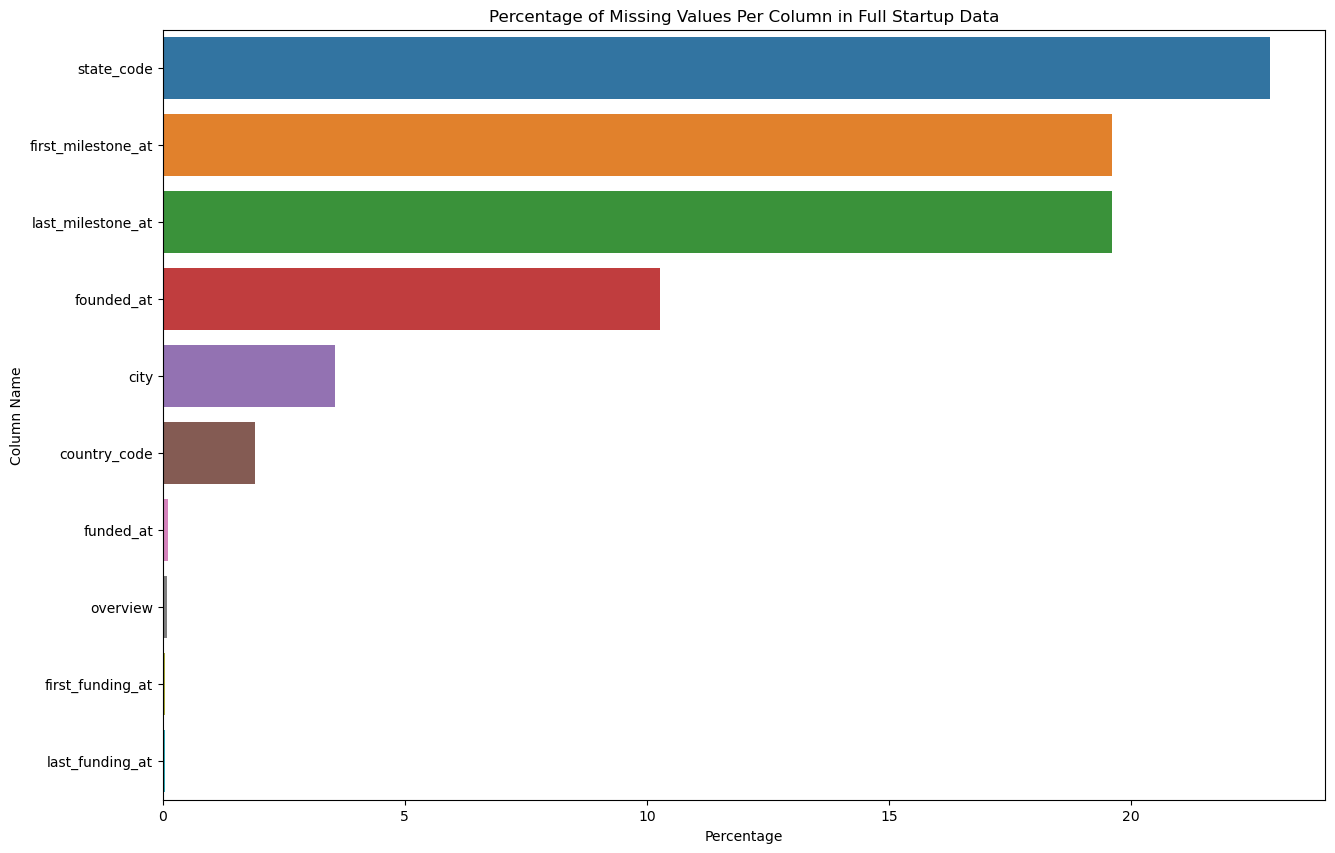

In [51]:
# Perform EDA for missing values in full_startup_df DataFrame

# Calculate the percentage of missing values for each column
missing_values = full_startup_df.isnull().mean() * 100

# Filter out columns that have no missing values to reduce clutter in the visualization
missing_values = missing_values[missing_values > 0]

# Sort the columns based on the percentage of missing values
missing_values.sort_values(ascending=False, inplace=True)

# Plot the results
plt.figure(figsize=(15, 10))
sns.barplot(x=missing_values.values, y=missing_values.index)
plt.title('Percentage of Missing Values Per Column in Full Startup Data')
plt.xlabel('Percentage')
plt.ylabel('Column Name')

# Show the plot
plt.show()

In [52]:
missing_state_code_df = full_startup_df[full_startup_df['state_code'].isna()]
missing_state_code_df

funded_object_id investor_object_id            name category_code  \
2515               c:65               f:52          blogTV   games_video   
2591               c:83               f:18        AllPeers           web   
2592               c:83               f:30        AllPeers           web   
2754               c:62               f:26           Skype      software   
2769               c:62               f:26           Skype      software   
...                 ...                ...             ...           ...   
407372         c:285244           p:267312  The New Motion     cleantech   
407373         c:285244           p:267312  The New Motion     cleantech   
407374         c:285244           p:267312  The New Motion     cleantech   
407375         c:285244           p:267312  The New Motion     cleantech   
407392          c:60389           p:268570      ROCKETHOME     cleantech   

           status  founded_at  \
2515     acquired  2006-05-01   
2591       closed  2004-08-01   
2592       closed  2004-08-01   
2754     acquired  2003-08-01   
2769     acquired  2003-08-01   
...           ...         ...   
407372  operating  2009-09-03   
407373  operating  2009-09-03   
407374  operating  2009-09-03   
407375  operating  2009-09-03   
407392  operating  2010-06-01   

                                                 overview country_code  \
2515    "Hello, blogTV is here! This is the place wher...          ISR   
2591    AllPeers is a simple, persistent buddy list in...          GBR   
2592    AllPeers is a simple, persistent buddy list in...          GBR   
2754    Skype is a software application that allows us...          LUX   
2769    Skype is a software application that allows us...          LUX   
...                                                   ...          ...   
407372  The New Motion offers advanced charging soluti...          NLD   
407373  The New Motion offers advanced charging soluti...          NLD   
407374  The New Motion offers advanced charging soluti...          NLD   
407375  The New Motion offers advanced charging soluti...          NLD   
407392  ROCKETHOME develops simple, intuitive home-ene...          DEU   

       state_code             city           region  investment_rounds  \
2515          NaN        Ramat Gan        Ramat Gan                0.0   
2591          NaN           Oxford           London                0.0   
2592          NaN           Oxford           London                0.0   
2754          NaN  Luxembourg City  Luxembourg City                3.0   
2769          NaN  Luxembourg City  Luxembourg City                3.0   
...           ...              ...              ...                ...   
407372        NaN        Amsterdam        Amsterdam                0.0   
407373        NaN        Amsterdam        Amsterdam                0.0   
407374        NaN        Amsterdam        Amsterdam                0.0   
407375        NaN        Amsterdam        Amsterdam                0.0   
407392        NaN          Cologne          Cologne                0.0   

        invested_companies first_funding_at last_funding_at  funding_rounds  \
2515                   0.0       2007-01-01      2007-01-01             1.0   
2591                   0.0       2006-03-01      2006-03-01             1.0   
2592                   0.0       2006-03-01      2006-03-01             1.0   
2754                   3.0       2002-01-01      2010-04-16             5.0   
2769                   3.0       2002-01-01      2010-04-16             5.0   
...                    ...              ...             ...             ...   
407372                 0.0       2009-01-01      2013-01-01             4.0   
407373                 0.0       2009-01-01      2013-01-01             4.0   
407374                 0.0       2009-01-01      2013-01-01             4.0   
407375                 0.0       2009-01-01      2013-01-01             4.0   
407392                 0.0       2013-07-10      2

In [53]:
# Impute missing values for specified columns with 'Unknown'
columns_to_impute_unknown = [
    'state_code', 'last_milestone_at', 'first_milestone_at',
    'founded_at', 'city', 'country_code', 'category_code', 'first_funding_at', 'last_funding_at', 'name',
    'funding_total_usd', 'fonding_at'
]

for col in columns_to_impute_unknown:
    # Check if the column exists before imputing to avoid KeyErrors
    if col in full_startup_df.columns:
        full_startup_df[col].fillna('Unknown', inplace=True)
    else:
        print(f"Column {col} not found in DataFrame.")

# Display the first few rows to confirm imputation
full_startup_df.head()

Column fonding_at not found in DataFrame.


funded_object_id investor_object_id  name category_code    status  \
0               c:4                f:1  Digg          news  acquired   
3               c:4                f:1  Digg          news  acquired   
6               c:4                f:1  Digg          news  acquired   
9               c:4                f:1  Digg          news  acquired   
12              c:4                f:2  Digg          news  acquired   

    founded_at                                           overview  \
0   2004-10-11  Digg is a user driven social content website. ...   
3   2004-10-11  Digg is a user driven social content website. ...   
6   2004-10-11  Digg is a user driven social content website. ...   
9   2004-10-11  Digg is a user driven social content website. ...   
12  2004-10-11  Digg is a user driven social content website. ...   

   country_code state_code           city  region  investment_rounds  \
0           USA         CA  San Francisco  SF Bay                0.0   
3           USA         CA  San Francisco  SF Bay                0.0   
6           USA         CA  San Francisco  SF Bay                0.0   
9           USA         CA  San Francisco  SF Bay                0.0   
12          USA         CA  San Francisco  SF Bay                0.0   

    invested_companies first_funding_at last_funding_at  funding_rounds  \
0                  0.0       2005-10-01      2011-07-12             4.0   
3                  0.0       2005-10-01      2011-07-12             4.0   
6                  0.0       2005-10-01      2011-07-12             4.0   
9                  0.0       2005-10-01      2011-07-12             4.0   
12                 0.0       2005-10-01      2011-07-12             4.0   

    funding_total_usd first_milestone_at last_milestone_at  milestones  \
0          45000000.0         2010-01-08        2013-12-04         8.0   
3          45000000.0         2010-01-08        2013-12-04         8.0   
6          45000000.0         2010-01-08        2013-12-04         8.0   
9          45000000.0         2010-01-08        2013-12-04         8.0   
12         45000000.0         2010-01-08        2013-12-04         8.0   

     funded_at funding_round_type funding_round_code  raised_amount_usd  \
0   2006-12-01           series-b                  b          8500000.0   
3   2005-10-01           series-a                  a          2800000.0   
6   2008-09-24          series-c+                  c         28700000.0   
9   2011-07-12          series-c+                  d          5000000.0   
12  2006-12-01           series-b                  b          8500000.0   

    raised_amount  pre_money_valuation_usd  post_money_valuation_usd  \
0       8500000.0                      0.0                       0.0   
3       2800000.0                      0.0                       0.0   
6      28700000.0                      0.0                       0.0   
9       5000000.0                      0.0                       0.0   
12      8500000.0                      0.0                       0.0   

    participants  is_first_round  is_last_round  
0              2               0              0  
3              8               0              1  
6              4               0              0  
9              0               1              0  
12             2               0              0

In [54]:
full_startup_df.head()

funded_object_id investor_object_id  name category_code    status  \
0               c:4                f:1  Digg          news  acquired   
3               c:4                f:1  Digg          news  acquired   
6               c:4                f:1  Digg          news  acquired   
9               c:4                f:1  Digg          news  acquired   
12              c:4                f:2  Digg          news  acquired   

    founded_at                                           overview  \
0   2004-10-11  Digg is a user driven social content website. ...   
3   2004-10-11  Digg is a user driven social content website. ...   
6   2004-10-11  Digg is a user driven social content website. ...   
9   2004-10-11  Digg is a user driven social content website. ...   
12  2004-10-11  Digg is a user driven social content website. ...   

   country_code state_code           city  region  investment_rounds  \
0           USA         CA  San Francisco  SF Bay                0.0   
3           USA         CA  San Francisco  SF Bay                0.0   
6           USA         CA  San Francisco  SF Bay                0.0   
9           USA         CA  San Francisco  SF Bay                0.0   
12          USA         CA  San Francisco  SF Bay                0.0   

    invested_companies first_funding_at last_funding_at  funding_rounds  \
0                  0.0       2005-10-01      2011-07-12             4.0   
3                  0.0       2005-10-01      2011-07-12             4.0   
6                  0.0       2005-10-01      2011-07-12             4.0   
9                  0.0       2005-10-01      2011-07-12             4.0   
12                 0.0       2005-10-01      2011-07-12             4.0   

    funding_total_usd first_milestone_at last_milestone_at  milestones  \
0          45000000.0         2010-01-08        2013-12-04         8.0   
3          45000000.0         2010-01-08        2013-12-04         8.0   
6          45000000.0         2010-01-08        2013-12-04         8.0   
9          45000000.0         2010-01-08        2013-12-04         8.0   
12         45000000.0         2010-01-08        2013-12-04         8.0   

     funded_at funding_round_type funding_round_code  raised_amount_usd  \
0   2006-12-01           series-b                  b          8500000.0   
3   2005-10-01           series-a                  a          2800000.0   
6   2008-09-24          series-c+                  c         28700000.0   
9   2011-07-12          series-c+                  d          5000000.0   
12  2006-12-01           series-b                  b          8500000.0   

    raised_amount  pre_money_valuation_usd  post_money_valuation_usd  \
0       8500000.0                      0.0                       0.0   
3       2800000.0                      0.0                       0.0   
6      28700000.0                      0.0                       0.0   
9       5000000.0                      0.0                       0.0   
12      8500000.0                      0.0                       0.0   

    participants  is_first_round  is_last_round  
0              2               0              0  
3              8               0              1  
6              4               0              0  
9              0               1              0  
12             2               0              0

### Handling Duplicates



In [55]:
# Identify duplicate rows (except for the first occurrence)
duplicate_rows = full_startup_df[full_startup_df.duplicated(keep='first')]

# Display the head of the duplicate rows
duplicate_rows.head()

Empty DataFrame
Columns: [funded_object_id, investor_object_id, name, category_code, status, founded_at, overview, country_code, state_code, city, region, investment_rounds, invested_companies, first_funding_at, last_funding_at, funding_rounds, funding_total_usd, first_milestone_at, last_milestone_at, milestones, funded_at, funding_round_type, funding_round_code, raised_amount_usd, raised_amount, pre_money_valuation_usd, post_money_valuation_usd, participants, is_first_round, is_last_round]
Index: []

In [56]:
# Count duplicates in the DataFrame
duplicate_count = full_startup_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [57]:
# Drop duplicates from the DataFrame
full_startup_df = full_startup_df.drop_duplicates()

# Check the new shape of the DataFrame to confirm duplicates have been removed
print(full_startup_df.shape)

(151828, 30)


### Dropping Rows where multiple useful columns are "unknown" or "nan"

In [58]:
import numpy as np

# Define the critical columns for which "Unknown" or NaN values make a row not useful
critical_columns = [
    'funded_object_id', 'investor_object_id', 'name', 'category_code',
    'funding_round_type', 'raised_amount_usd', 'funding_total_usd', 'status'
]

# First, replace "Unknown" with NaN for uniformity in handling missing values
full_startup_df.replace("Unknown", np.nan, inplace=True)

# Drop rows where any of the critical columns have NaN values
full_startup_df = full_startup_df.dropna(subset=critical_columns)

# Display the shape of the DataFrame after dropping rows
full_startup_df.shape


(151828, 30)

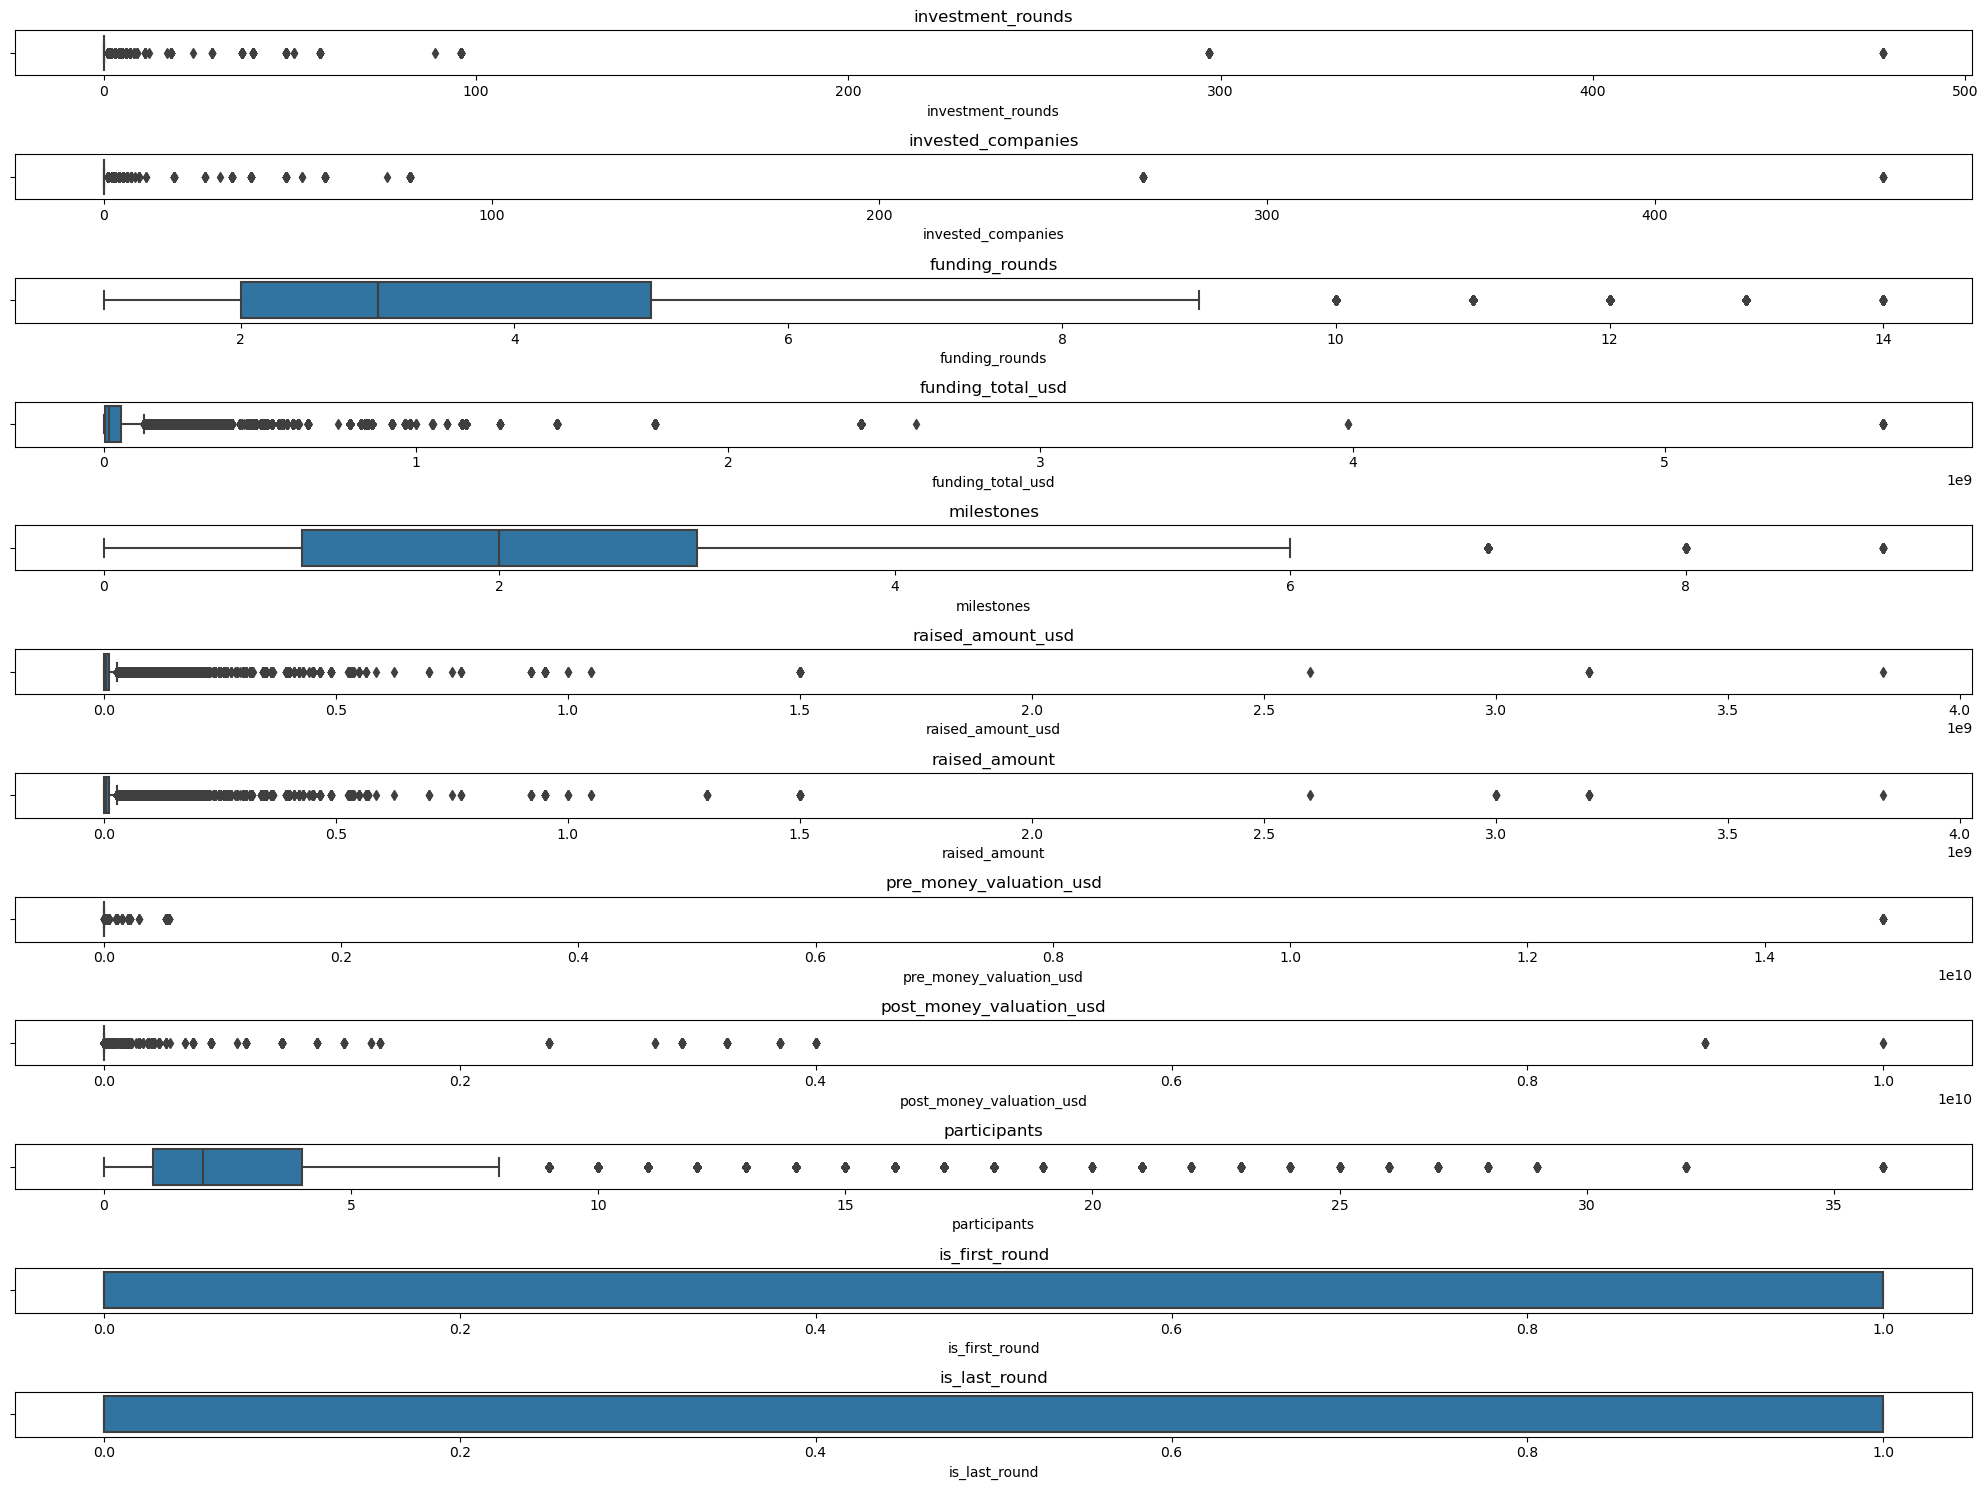

In [59]:
# To visualize outliers for all numerical columns in the DataFrame, you can use box plots.
# Box plots are excellent for spotting outliers, as they graphically depict the distribution of numerical data
# through their quartiles, highlighting the presence of outliers.

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cleaned_df' is your DataFrame after cleaning
numerical_cols = full_startup_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Plotting box plots for each numerical column
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x=cleaned_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()